In [1]:
import pandas as pd
dataset=pd.read_csv("50_Startups.csv")


In [2]:
#dataset.columns

In [3]:
#convert dataset as numerical data
dataset=pd.get_dummies(dataset, drop_first=True, dtype=int)

In [4]:
dataset.columns


Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [5]:
# split input and output data
independent=dataset[['R&D Spend', 'Administration', 'Marketing Spend']]
dependent=dataset[['Profit']]

In [6]:
# Split data for train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test =train_test_split(independent,dependent,test_size=.3, random_state=1)

In [7]:
#X_train,X_test, Y_train,Y_test

In [8]:
# model creation
from sklearn.tree import DecisionTreeRegressor


regresser=DecisionTreeRegressor(criterion='squared_error', max_features='sqrt', splitter='best')  #0.44323256279842604
#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='sqrt', splitter='random') #0.755365917950601

#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='auto', splitter='best')  # 0.846630711092898
#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='auto', splitter='random') # 0.8318818392067282

#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='log2', splitter='best')  #0.1578148625138568
#regresser=DecisionTreeRegressor(criterion='squared_error', max_features='log2', splitter='random') #0.6223517674578438

#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='auto', splitter='best') #0.8565691453177624
#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',splitter='random') #0.6887290943022052

#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='best') #0.20791977234656334 
#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='sqrt', splitter='random') #0.7720646048525076

#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='log2', splitter='best') # 0.6902066151368287
#regresser=DecisionTreeRegressor(criterion='friedman_mse', max_features='log2', splitter='random') # 0.4996631905006983

#regresser=DecisionTreeRegressor(criterion='poisson', max_features='sqrt', splitter='best') # 0.4765952287791997
#regresser=DecisionTreeRegressor(criterion='poisson', max_features='sqrt', splitter='random') # 0.2701373372637572

#regresser=DecisionTreeRegressor(criterion='poisson', max_features='log2', splitter='best') #0.5406251834890876
#regresser=DecisionTreeRegressor(criterion='poisson', max_features='log2', splitter='random') # 0.7212413656272716

#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt', splitter='best') # 0.7116747658916952
#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='sqrt', splitter='random') # 0.10610914175176489

#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='log2', splitter='best') # 0.5097551117216521
#regresser=DecisionTreeRegressor(criterion='absolute_error', max_features='log2', splitter='random') # 0.79552031821966



regresser=regresser.fit(X_train,Y_train)

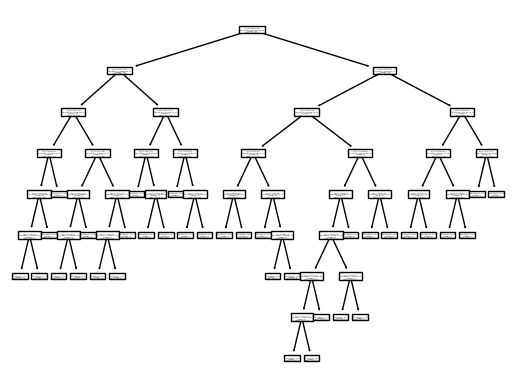

In [9]:
# plot the tree
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regresser)
plt.show()

In [10]:
Y_pred=regresser.predict(X_test)

In [11]:
# Find r2_score
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test,Y_pred)

In [12]:
r2_score

0.39899577481183457